In [6]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:

#Read the data and glimpse it
df = pd.read_csv('AB_NYC.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
df.count()

id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       38843
reviews_per_month                 38843
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [9]:
# Data Understanding
def display_bar_chart(df, column, title):
  
    status_vals = df[column].value_counts()
    (status_vals[:10]/df.shape[0]).plot(kind="bar");
    plt.title(title);

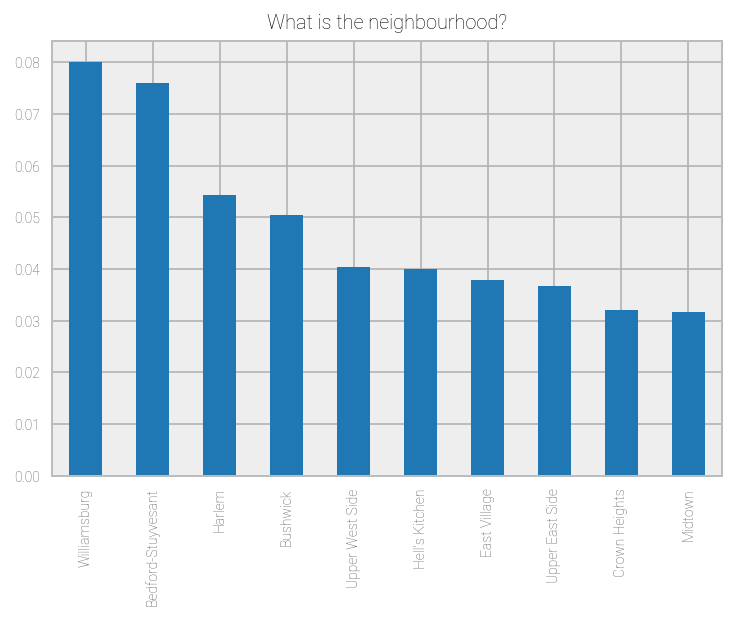

In [6]:
#Provide a pandas series of the counts for each Professional status
display_bar_chart(df, "neighbourhood", "What is the neighbourhood?")

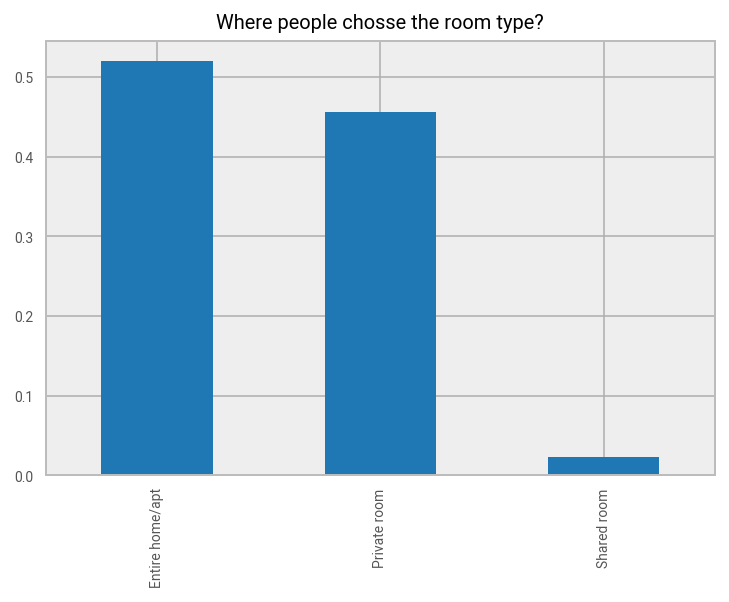

In [10]:

#Provide a pandas series of the counts for each Country
display_bar_chart(df, "room_type", "Where people chosse the room type?")

In [11]:
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [12]:
#data data preparation
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
(df['last_review'].isnull()==df['reviews_per_month'].isnull()).all()


True

In [14]:
daa=df[df['price']>100]


In [15]:
daa.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.496700e+04,2.496700e+04,24967.000000,24967.000000,24967.000000,24967.000000,24967.000000,19444.000000,24967.000000,24967.000000
mean,1.865247e+07,6.428377e+07,40.732156,-73.965592,234.054392,7.793888,22.207193,1.289495,10.954860,120.275363
std,1.133758e+07,7.903750e+07,0.046000,0.037707,314.665962,22.265851,42.314231,1.512891,44.588506,133.241164
min,2.539000e+03,2.571000e+03,40.499790,-74.240840,101.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.538372e+06,6.437251e+06,40.704975,-73.989270,135.000000,2.000000,1.000000,0.190000,1.000000,0.000000
50%,1.922753e+07,2.523349e+07,40.730050,-73.972080,175.000000,3.000000,5.000000,0.670000,1.000000,60.000000
75%,2.945432e+07,1.013835e+08,40.762180,-73.949740,249.000000,5.000000,22.000000,2.000000,2.000000,247.000000
max,3.648543e+07,2.743213e+08,40.907340,-73.716900,10000.000000,1250.000000,488.000000,27.950000,327.000000,365.000000


ModuleNotFoundError: No module named 'sklearn'

In [2]:
!pip3 install sklearn

     |████████████████████████████████| 7.0MB 144kB/s eta 0:00:01
     |████████████████████████████████| 296kB 463kB/s eta 0:00:01
  Stored in directory: /home/cdsw/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [19]:
#Data Model

feature_cols = ['price', 'minimum_nights', 'number_of_reviews']
X = df[feature_cols] # Features
y = df.price # Target variable

In [21]:
from sklearn.model_selection import train_test_split # Import train_test_split function



In [22]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [24]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier


In [25]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [27]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.993728270502


In [30]:
!pip3 install pydotplus

     |████████████████████████████████| 286kB 55kB/s eta 0:00:011
  Stored in directory: /home/cdsw/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
You should consider upgrading via the 'pip install --upgrade pip' command.


In [36]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus



In [37]:
dot_data = StringIO()


In [38]:
!pip3 install graphviz



You should consider upgrading via the 'pip install --upgrade pip' command.


In [43]:
export_graphviz(clf, out_file=dot_data)

In [46]:
!pip3 install pydotplus



You should consider upgrading via the 'pip install --upgrade pip' command.


In [35]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.99
